<a href="https://colab.research.google.com/github/anoushkagarg003/time_series_metro_dataset/blob/main/prophet_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install prophet

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


import datetime
from datetime import date
import random


import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv.gz', infer_datetime_format=True)
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [10]:
data['date_time'] =  pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index(pd.DatetimeIndex(data['date_time'])).rename(columns={"date_time": "ds"}).drop_duplicates(subset=['ds'])
ts = data['2018-06-30':'2018-09-29']
ts.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,traffic_volume
date_time,,,,,,,,,
2018-06-30 00:00:00,NaN,302.87,0.0,0.0,1,Clear,sky is clear,2018-06-30 00:00:00,1423
2018-06-30 01:00:00,NaN,302.58,0.0,0.0,1,Clear,sky is clear,2018-06-30 01:00:00,869
2018-06-30 02:00:00,NaN,302.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,2018-06-30 02:00:00,617
2018-06-30 03:00:00,NaN,302.29,0.0,0.0,40,Rain,moderate rain,2018-06-30 03:00:00,429
2018-06-30 04:00:00,NaN,301.29,0.0,0.0,1,Rain,light rain,2018-06-30 04:00:00,429


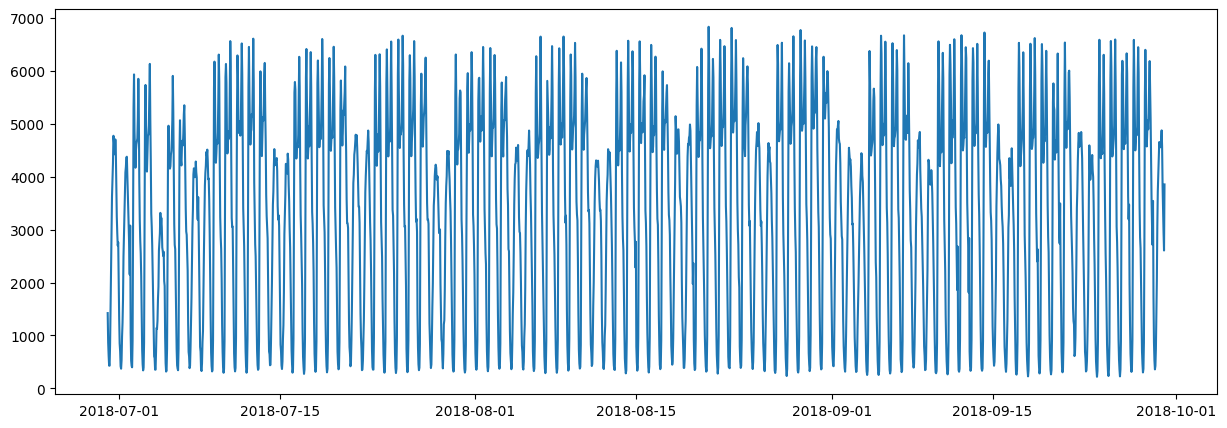

In [11]:
plt.figure(figsize=(15,5))
plt.plot(ts.traffic_volume)
plt.show()

In [12]:
split_date = '2018-09-22'
ts_train = ts.loc[ts.index <= split_date].copy()
ts_test = ts.loc[ts.index > split_date].copy()

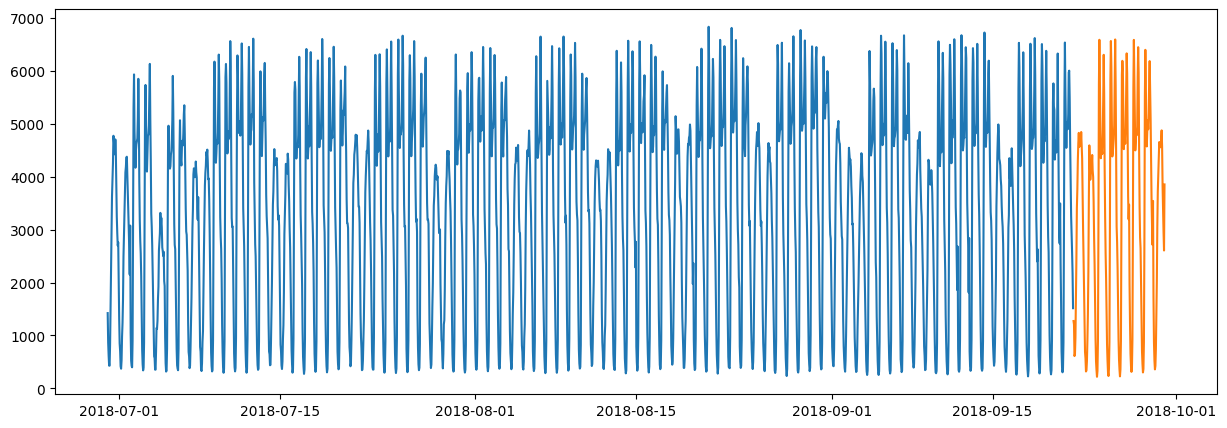

In [13]:
plt.figure(figsize=(15,5))
plt.plot(ts_train.traffic_volume)
plt.plot(ts_test.traffic_volume)
plt.show()

In [14]:
ts_train = ts_train.rename(columns={'traffic_volume':'y'})
ts_test = ts_test.rename(columns={'traffic_volume':'y'})

In [15]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

model.fit(ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/8qf4whtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/tsu8hlz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83382', 'data', 'file=/tmp/tmpsfekhswv/8qf4whtp.json', 'init=/tmp/tmpsfekhswv/tsu8hlz7.json', 'output', 'file=/tmp/tmpsfekhswv/prophet_modelytl47u5r/prophet_model-20240725162925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:29:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
y_pred = model.predict(df=ts_test)

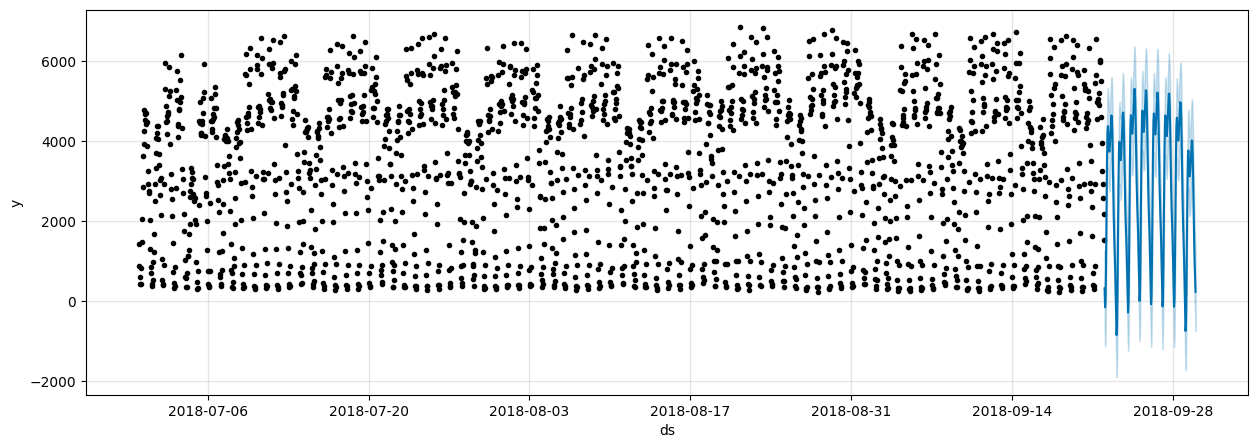

In [17]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_pred, ax=ax)

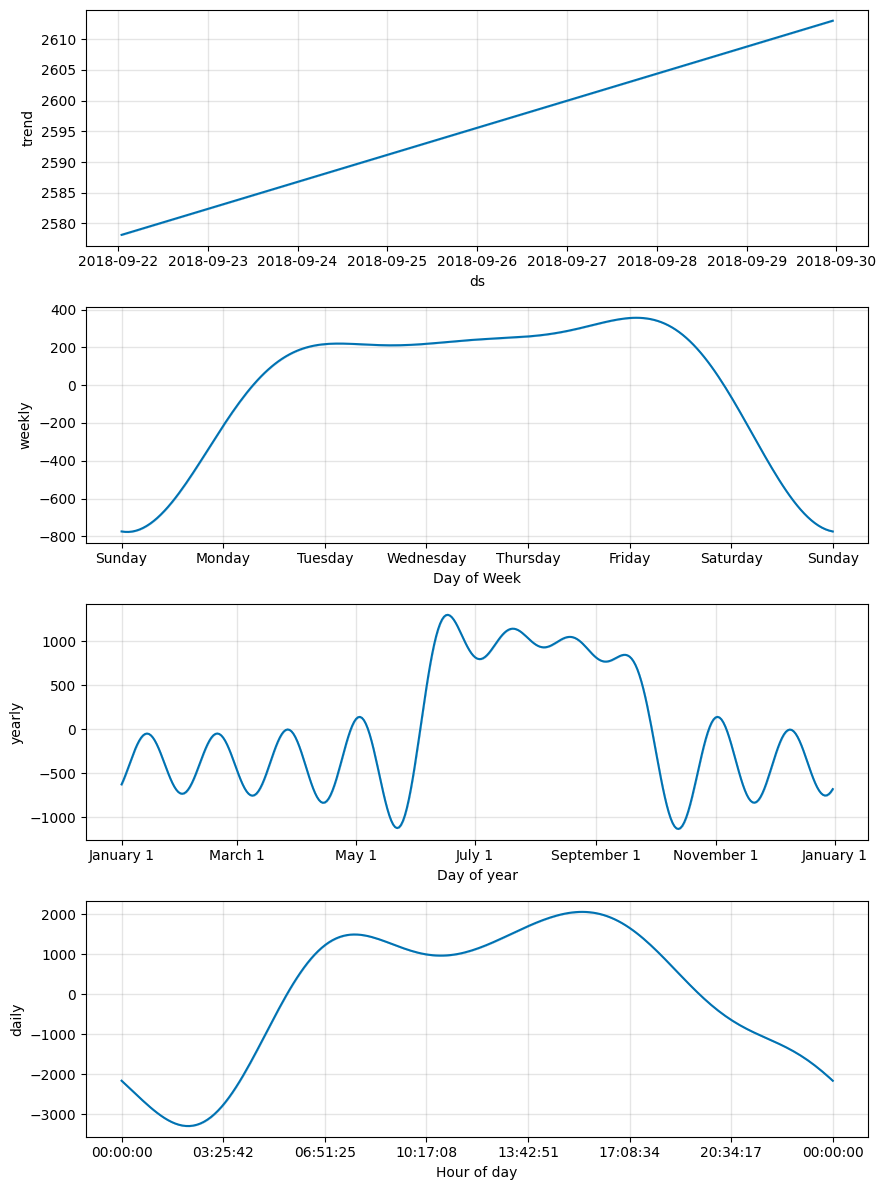

In [18]:
fig = model.plot_components(y_pred)

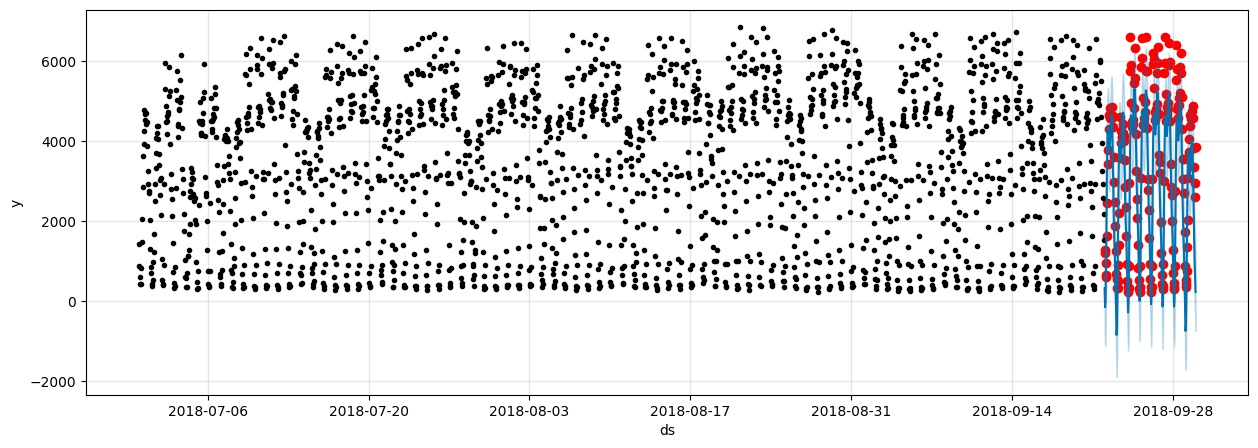

In [19]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred, ax=ax)

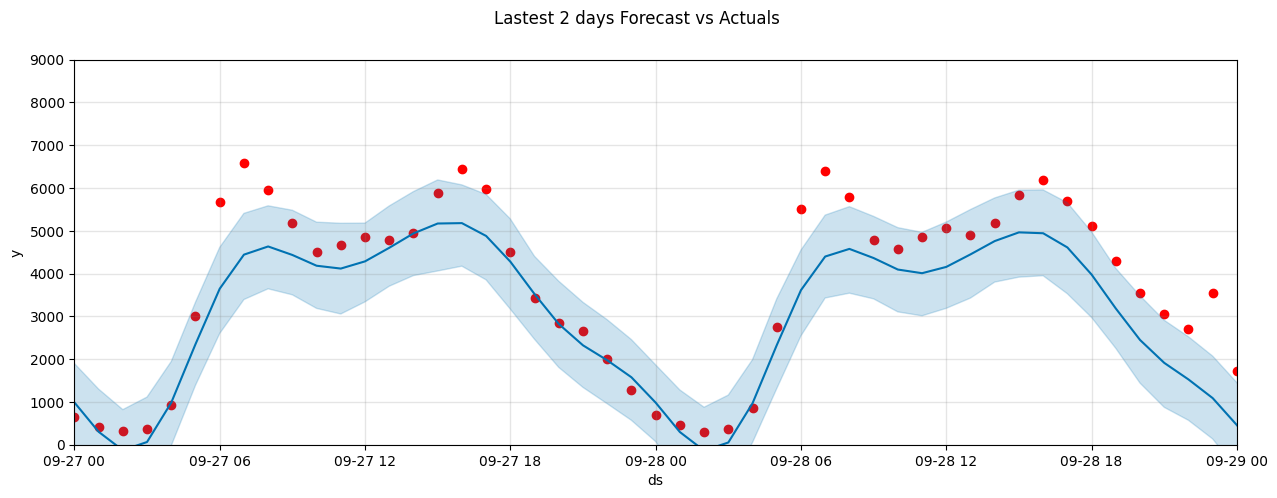

In [20]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred, ax=ax)
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 9000)
plot = plt.suptitle('Lastest 2 days Forecast vs Actuals')

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def error_metrics(y_true, y_pred):
    print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_true, y_pred)))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('Mean Absolute percentage Error: {:.2f} %'.format(mean_absolute_percentage_error(y_true, y_pred)))

In [22]:
error_metrics(ts_test.y, y_pred['yhat'])

Mean Absolute Error: 755.65
Root Mean Squared Error: 985.93
Mean Absolute percentage Error: 40.36 %


In [23]:
model_with_temp = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model_with_temp.add_regressor('temp')
model_with_temp.fit(df=ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/9fv47jzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/mxhseeow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16640', 'data', 'file=/tmp/tmpsfekhswv/9fv47jzd.json', 'init=/tmp/tmpsfekhswv/mxhseeow.json', 'output', 'file=/tmp/tmpsfekhswv/prophet_model8ix06wfo/prophet_model-20240725163140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
y_pred_1r = model_with_temp.predict(df=ts_test)

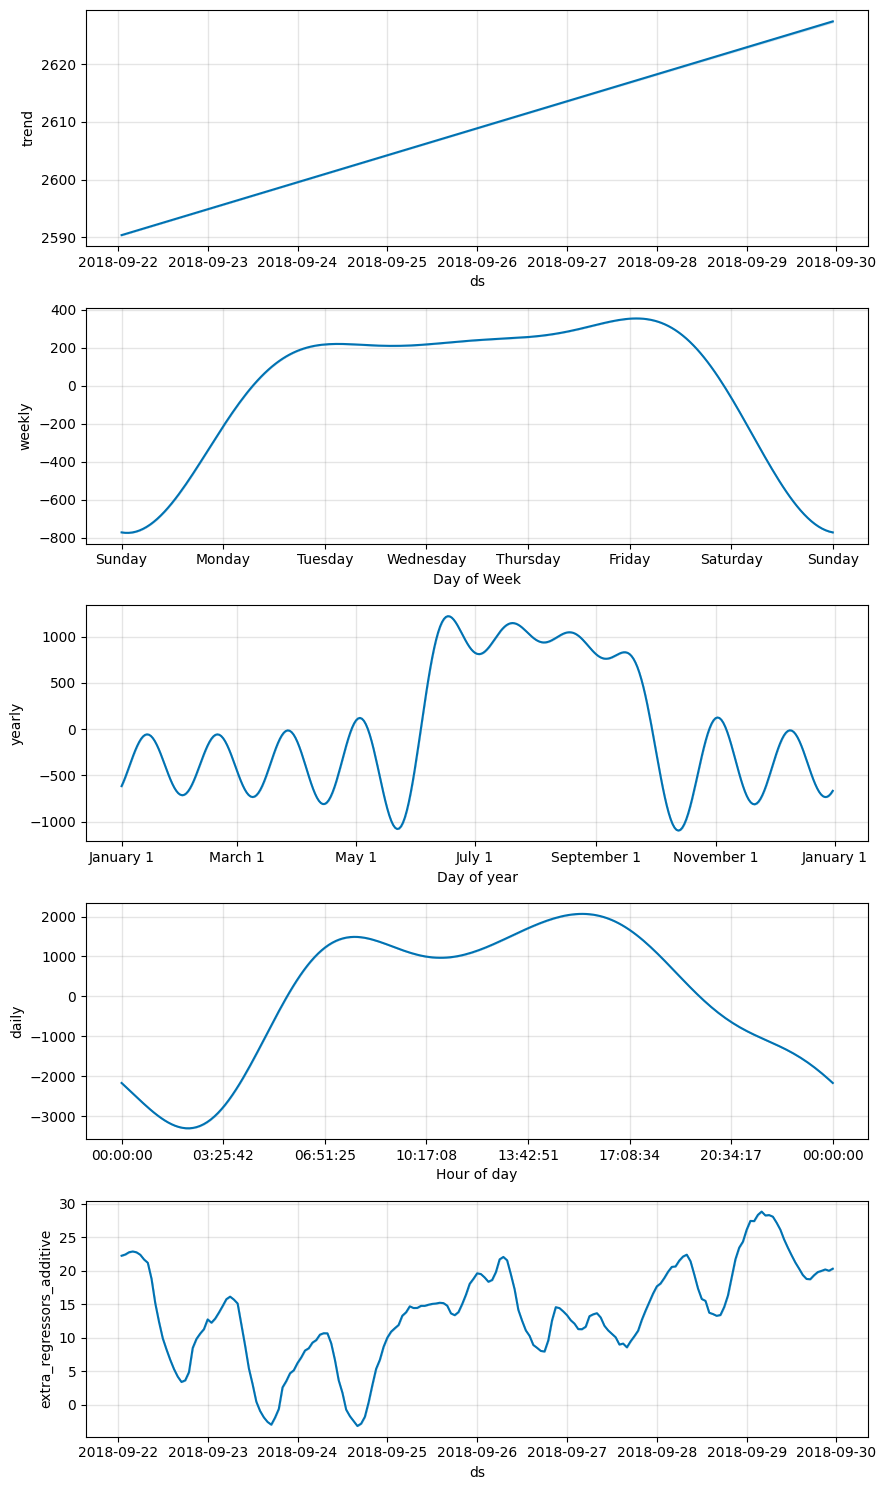

In [25]:
fig2 = model_with_temp.plot_components(y_pred_1r)

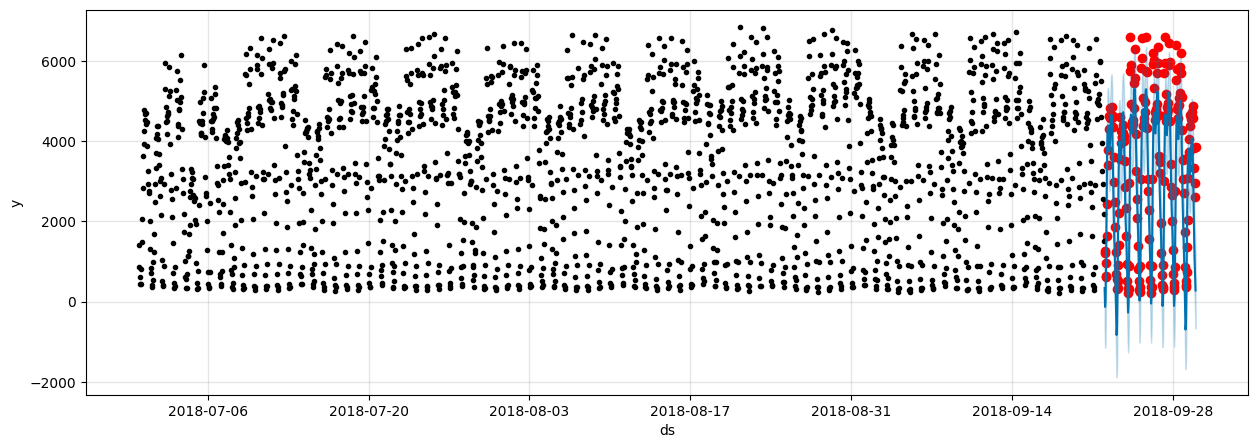

In [26]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig2 = model_with_temp.plot(y_pred_1r, ax=ax)

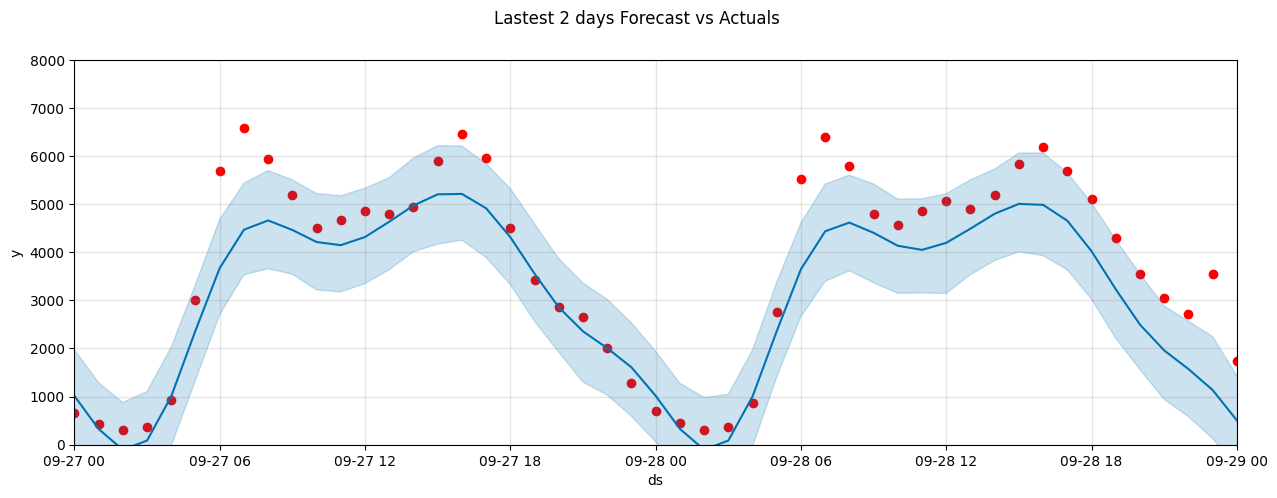

In [27]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_1r, ax=ax)
#ax.set_xbound(lower='2018-09-22', upper='2018-09-29')
#ax.set_xbound(lower='2012-10-02 09:00:00', upper='2018-30-29 09:00:00')
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 8000)
plot = plt.suptitle('Lastest 2 days Forecast vs Actuals')


In [28]:

error_metrics(ts_test.y, y_pred_1r['yhat'])

Mean Absolute Error: 742.35
Root Mean Squared Error: 970.90
Mean Absolute percentage Error: 39.70 %


In [29]:
model_reg = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model_reg.add_regressor('temp')
model_reg.add_regressor('rain_1h')
model_reg.add_regressor('snow_1h')
model_reg.add_regressor('clouds_all')
model_reg.fit(df=ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/eg3f8ho2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/1d1_kk6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48129', 'data', 'file=/tmp/tmpsfekhswv/eg3f8ho2.json', 'init=/tmp/tmpsfekhswv/1d1_kk6o.json', 'output', 'file=/tmp/tmpsfekhswv/prophet_modeljw1a3o0v/prophet_model-20240725163258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
y_pred_mr = model_reg.predict(df=ts_test)
y_pred_mr.yhat[y_pred_mr.yhat < 0] = 0

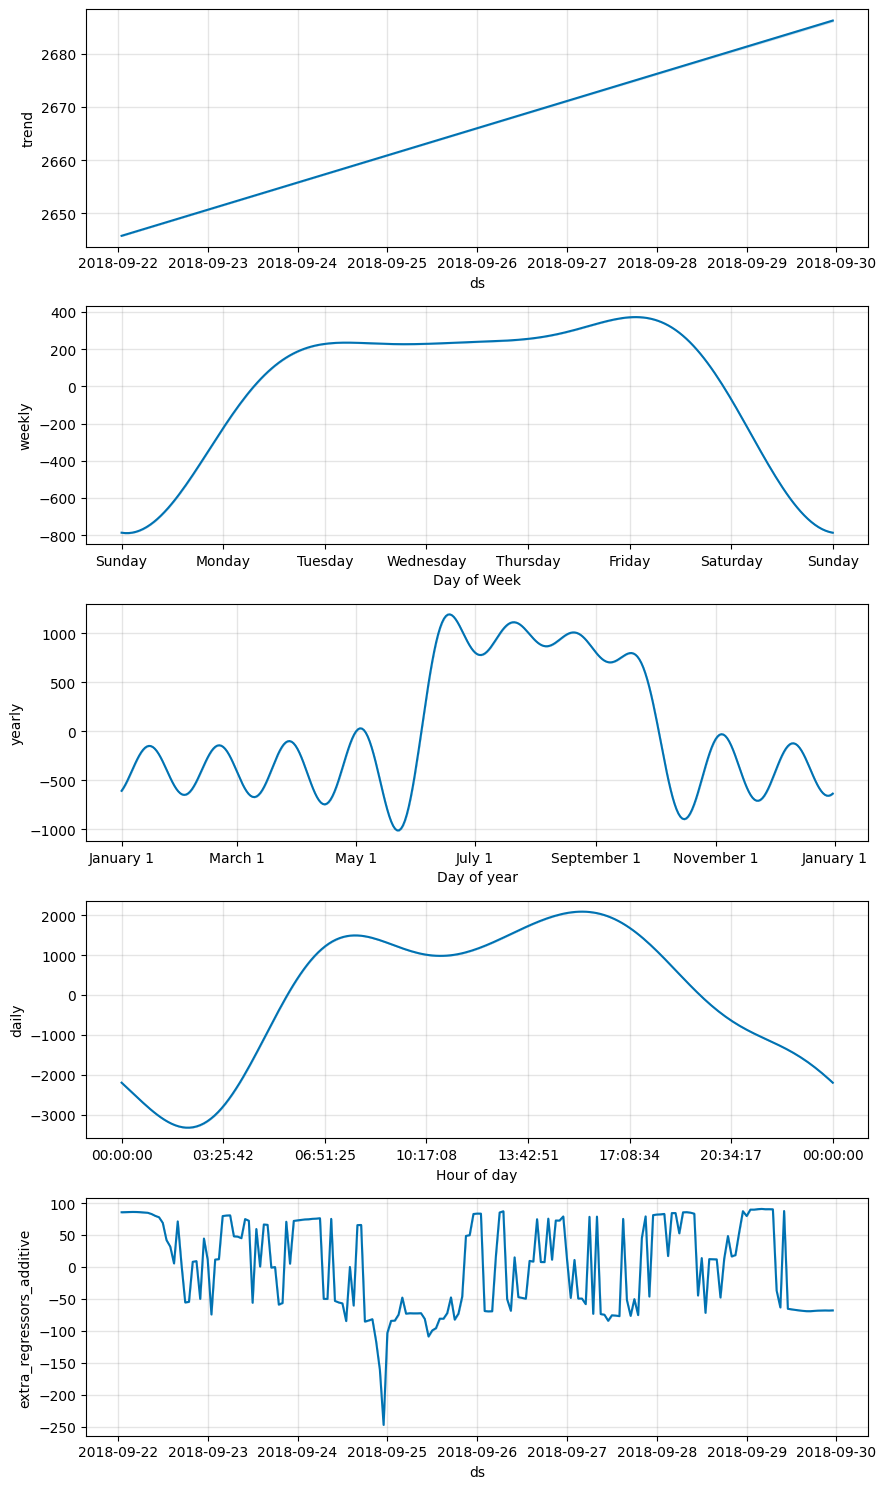

In [31]:
fig2 = model_reg.plot_components(y_pred_mr)

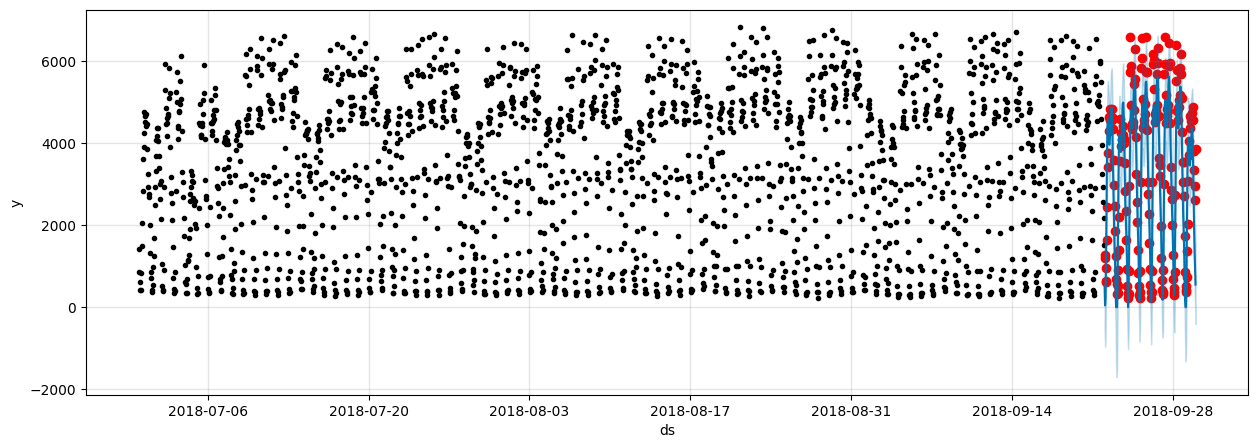

In [32]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig2 = model_with_temp.plot(y_pred_mr, ax=ax)

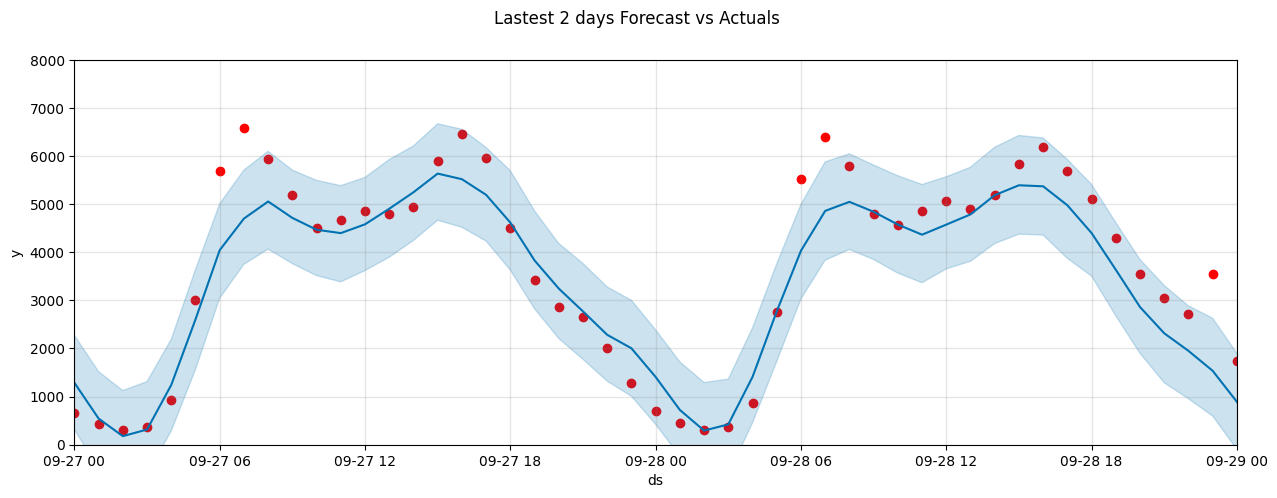

In [33]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_mr, ax=ax)
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 8000)
plot = plt.suptitle('Lastest 2 days Forecast vs Actuals')

In [34]:

error_metrics(ts_test.y, y_pred_mr['yhat'])

Mean Absolute Error: 648.55
Root Mean Squared Error: 871.52
Mean Absolute percentage Error: 34.50 %


optimising the model

In [35]:
ts_train['cap'] = 8000
ts_train['floor'] = 0
ts_test['cap'] = 8000
ts_test['floor'] = 0

In [36]:
model = Prophet(growth='linear',
                #holidays=holidays,
                seasonality_mode= 'additive',
                changepoint_prior_scale=10,
                seasonality_prior_scale=0.01,
                #holidays_prior_scale=20,
                daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
               ).add_seasonality(name = 'monthly', period = 30.5, fourier_order=20
               ).add_seasonality(name= 'daily', period= 1, fourier_order= 12
               ).add_seasonality(name= 'weekly', period= 7, fourier_order= 24)
model.add_regressor('temp')
model.add_regressor('rain_1h')
model.add_regressor('snow_1h')
model.add_regressor('clouds_all')

model.fit(ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/x1ceih_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfekhswv/6eqnt6dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51555', 'data', 'file=/tmp/tmpsfekhswv/x1ceih_v.json', 'init=/tmp/tmpsfekhswv/6eqnt6dg.json', 'output', 'file=/tmp/tmpsfekhswv/prophet_modelz0lzup5k/prophet_model-20240725163447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
y_pred_op = model.predict(df=ts_test)
y_pred_op.yhat[y_pred_op.yhat < 0] = 0

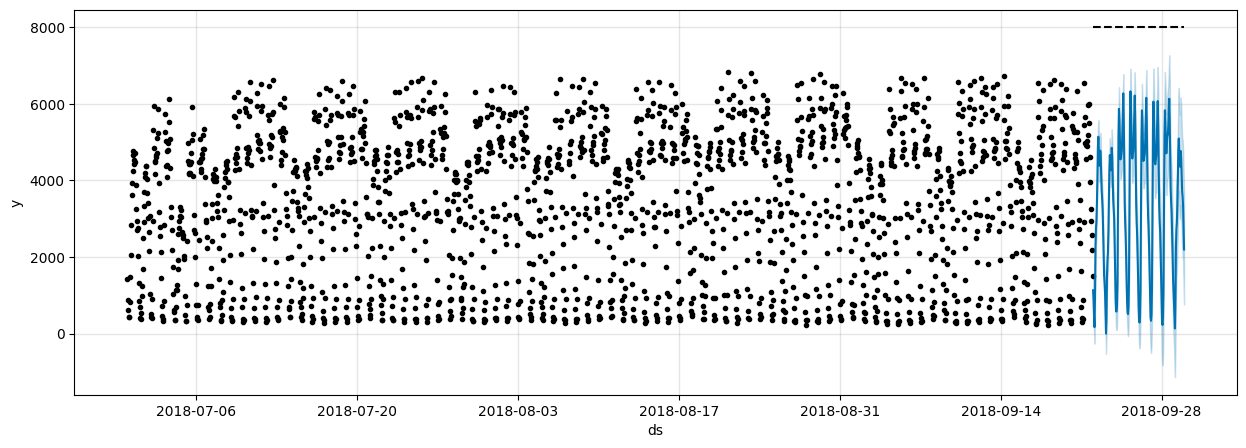

In [38]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_pred_op, ax=ax)

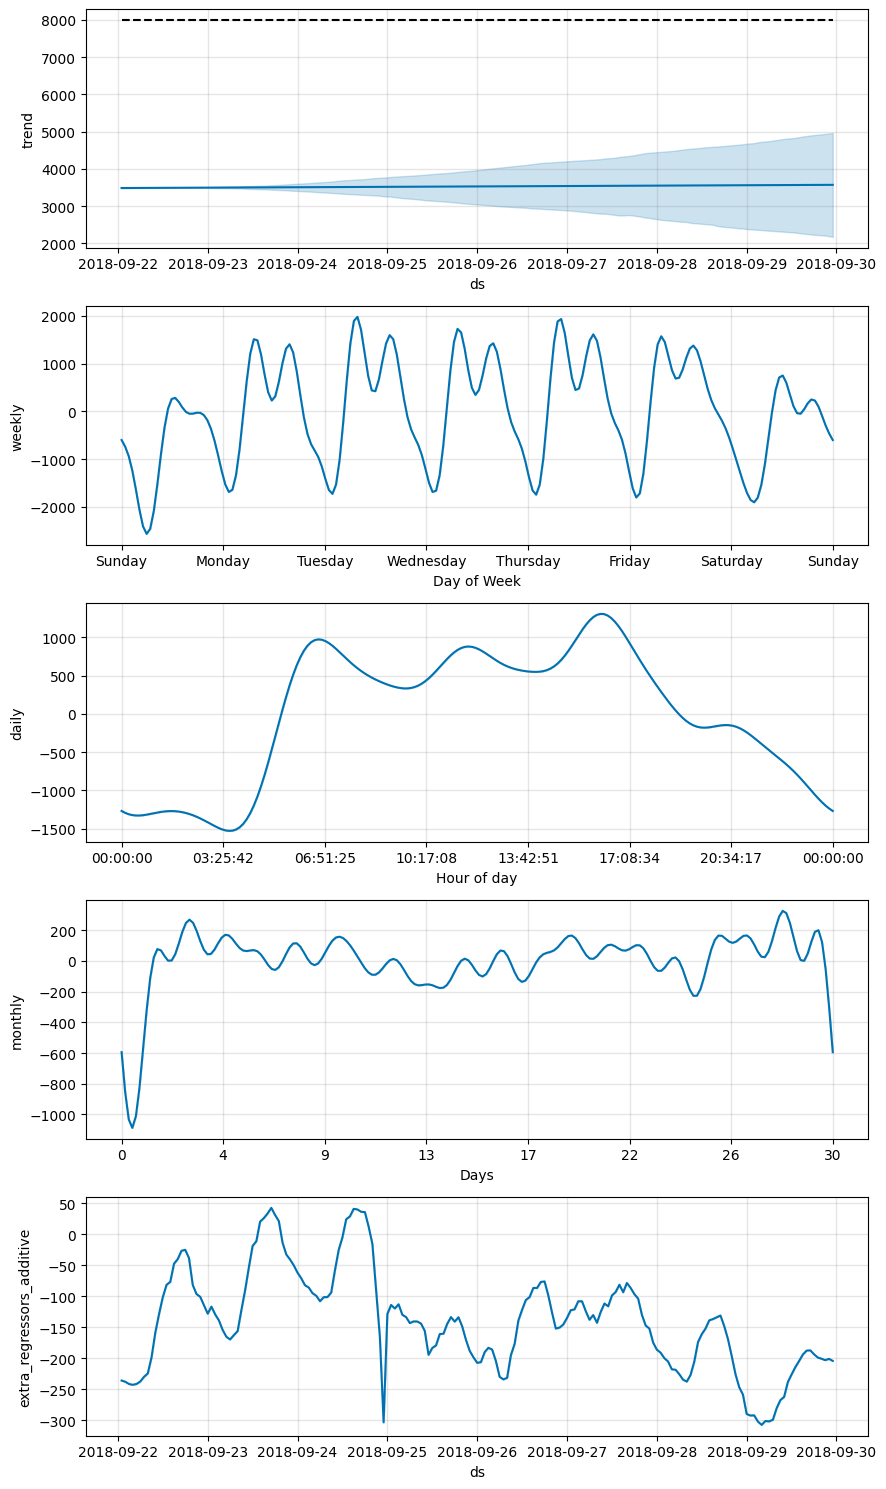

In [39]:
fig = model.plot_components(y_pred_op)

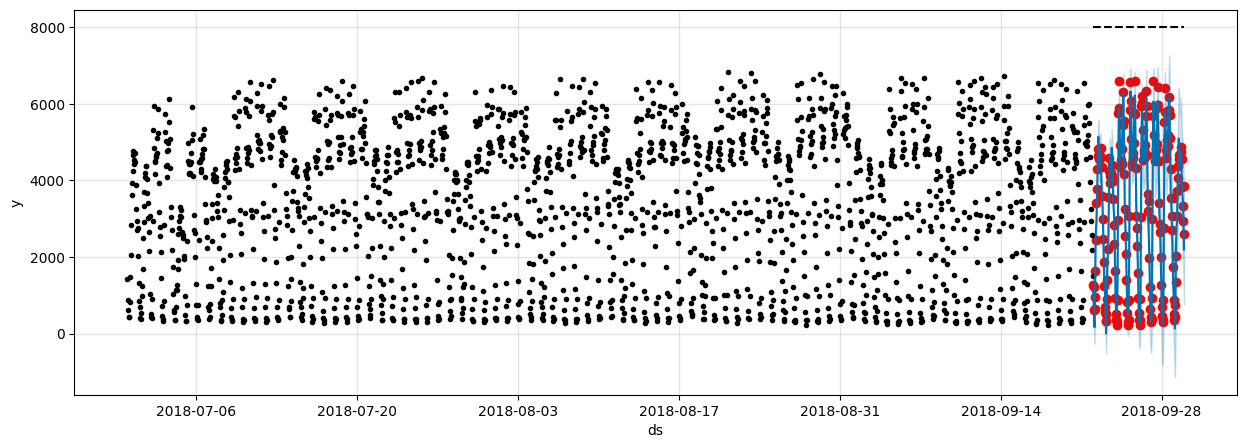

In [40]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_op, ax=ax)

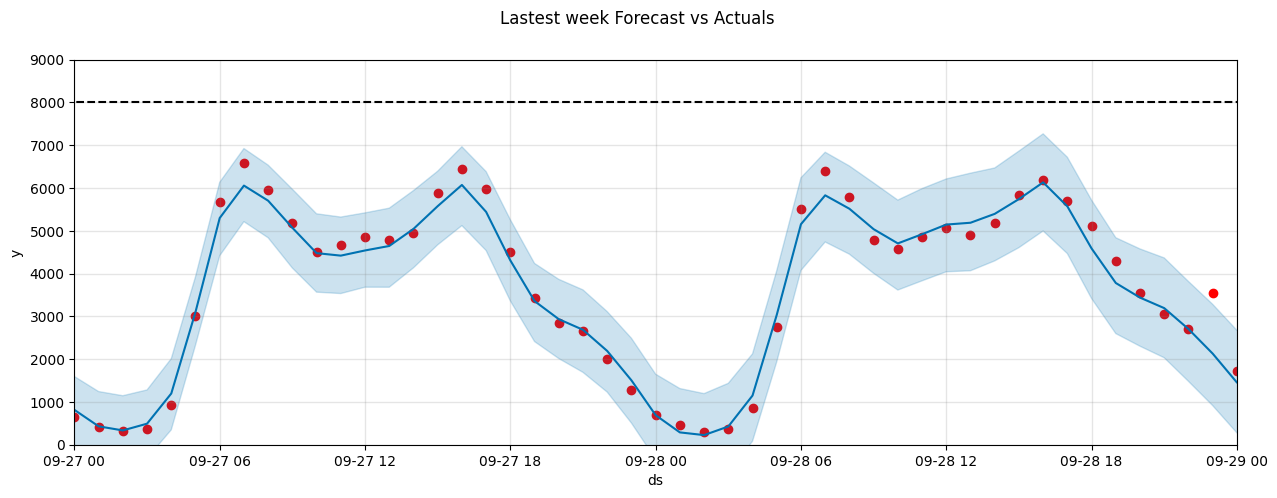

In [41]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_op, ax=ax)
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 9000)
plot = plt.suptitle('Lastest week Forecast vs Actuals')

In [42]:
error_metrics(ts_test.y, y_pred_op['yhat'])

Mean Absolute Error: 292.38
Root Mean Squared Error: 379.44
Mean Absolute percentage Error: 18.32 %
